In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# eCommerce Data
https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop?select=2020-Jan.csv

- 2020년 1월과 2월의 데이터 비교 분석
- 고객 행동 데이터 분석
    - 고객을 세분화하여 그에 어울리는 마케팅 계획 수립
    - 특히 기존 고객 유지를 위해 VVIP 고객층과 VIP 고객층의 구매 이력을 알아보려고 한다.

# 데이터 정리

In [18]:
df1 = pd.read_csv('2020_Jan_ecommerce.csv')
df2 = pd.read_csv('2020_Feb_ecommerce.csv')

In [19]:
df = pd.concat([df1, df2], axis=0)

In [20]:
df.shape

(8421434, 9)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8421434 entries, 0 to 4156681
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 642.5+ MB


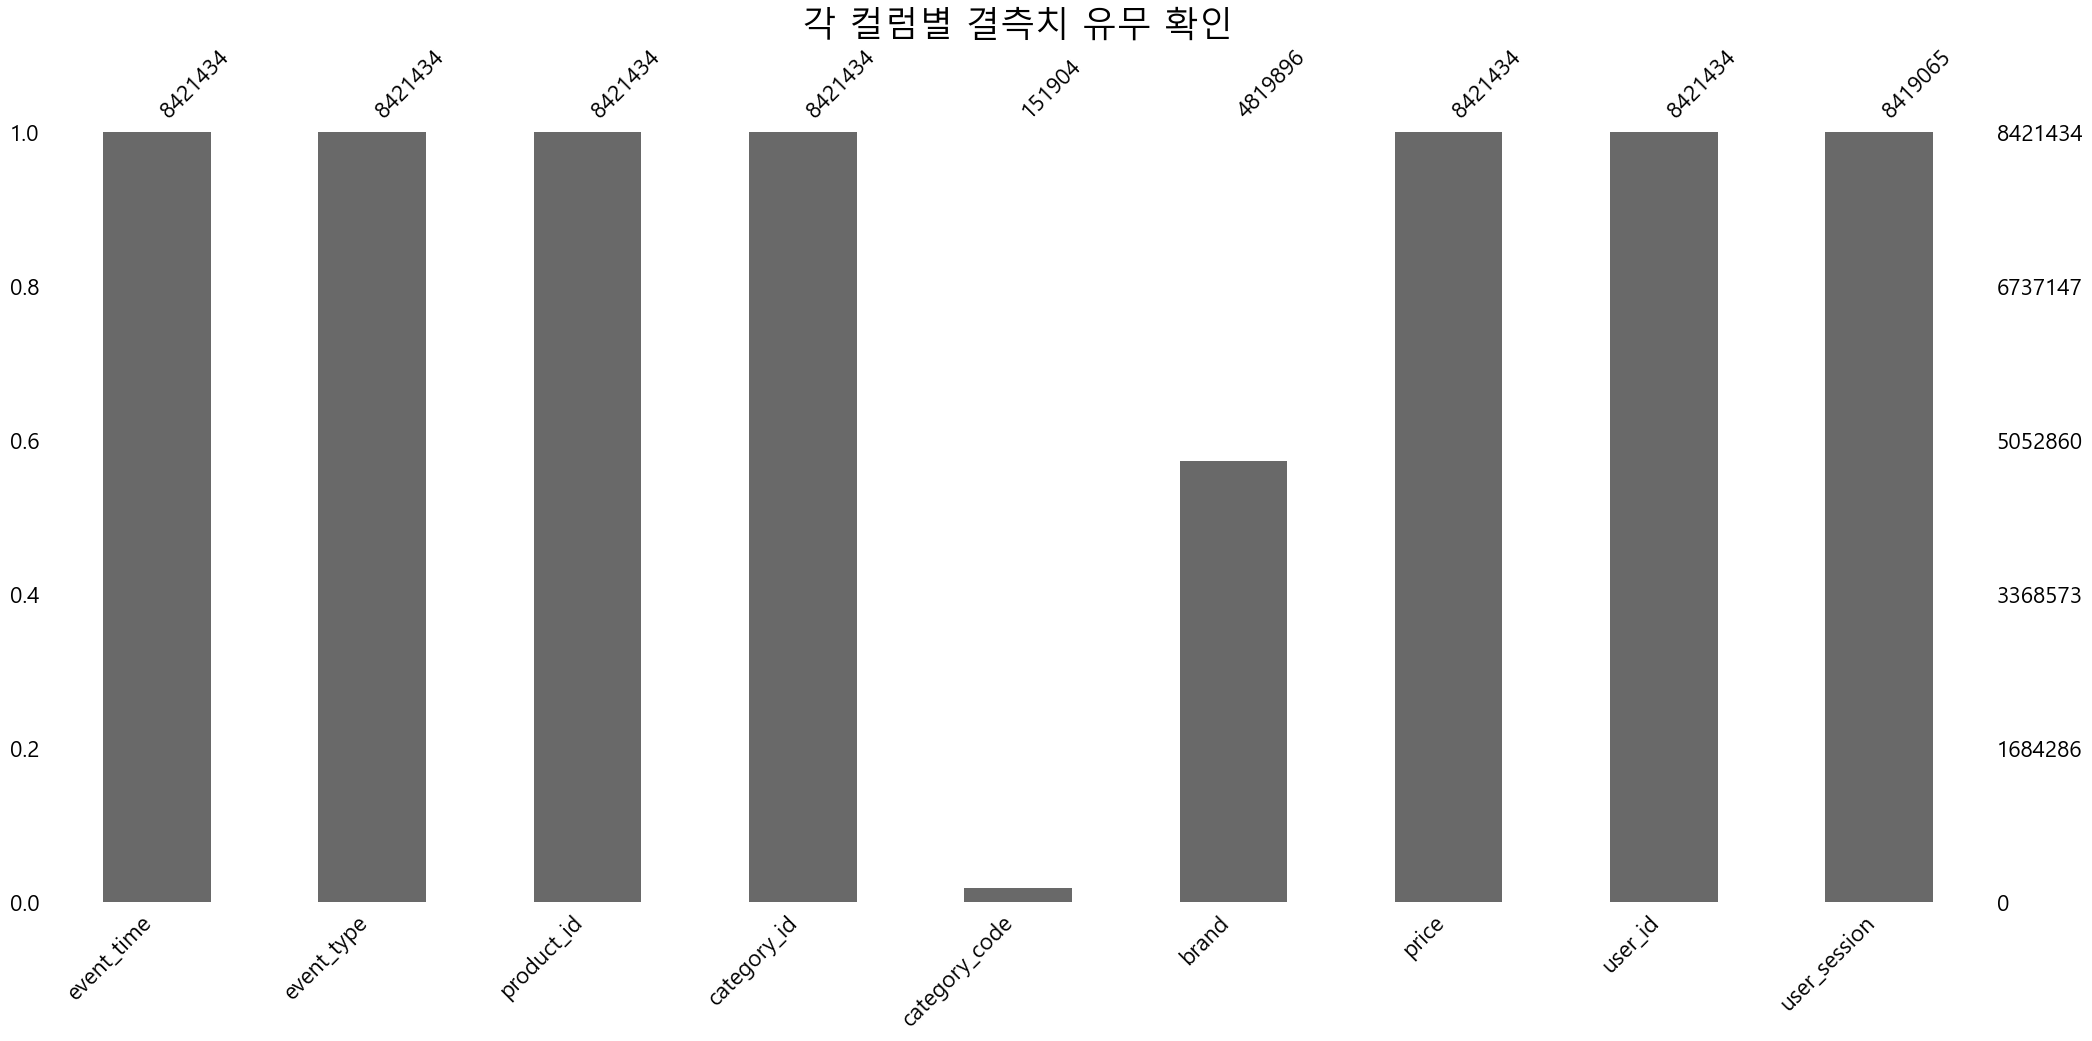

In [22]:
plt.figure(figsize = (20, 5))
msno.bar(df)
plt.title('각 컬럼별 결측치 유무 확인', fontsize = 25);

In [11]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    8269530
brand            3601538
price                  0
user_id                0
user_session        2369
dtype: int64

In [23]:
# category_code의 누락값 비율 = 98%
a = round((df.category_code.isnull().sum() / len(df)) * 100, 3)
print(f'category_code의 결측 비율 : {a}')

category_code의 결측 비율 : 98.196


In [24]:
# brand의 누락값 비율 = 47%
b = round((df.brand.isnull().sum() / len(df)) * 100, 3)
print(f'brand의 결측 비율 : {b}')

brand의 결측 비율 : 42.766


In [14]:
# category_code 및 user_session 삭제
df.drop(['category_code', 'user_session'], axis=1, inplace = True)

In [15]:
# event_time 컬럼을 datetime 자료형으로 바꾸기 위해 작업 (UTC 삭제)
df['event_time'] = df['event_time'].str.split(' ').str[:2].str.join(' ')

In [16]:
df.to_csv('df_jantofeb.csv', index=False)

# 데이터 불러오기

In [4]:
df_all = pd.read_csv('df_jantofeb.csv')

In [5]:
df_all.head()

event_time event_type  product_id          category_id     brand  \
0  2020-01-01 00:00:00       view     5809910  1602943681873052386   grattol   
1  2020-01-01 00:00:09       view     5812943  1487580012121948301  kinetics   
2  2020-01-01 00:00:19       view     5798924  1783999068867920626    zinger   
3  2020-01-01 00:00:24       view     5793052  1487580005754995573       NaN   
4  2020-01-01 00:00:25       view     5899926  2115334439910245200       NaN   

   price    user_id  
0   5.24  595414620  
1   3.97  595414640  
2   3.97  595412617  
3   4.92  420652863  
4   3.92  484071203

In [6]:
df_all['event_time'] = pd.to_datetime(df_all['event_time'])

In [7]:
df_all['date'] = df_all['event_time'].dt.strftime('%m/%d')

In [8]:
df_all['month'] = df_all['event_time'].dt.month

In [9]:
# 일
df_all['day'] = df_all['event_time'].dt.day

In [10]:
df_all['day_name'] = df_all['event_time'].dt.day_name()

In [11]:
df_all.head()

event_time event_type  product_id          category_id     brand  \
0 2020-01-01 00:00:00       view     5809910  1602943681873052386   grattol   
1 2020-01-01 00:00:09       view     5812943  1487580012121948301  kinetics   
2 2020-01-01 00:00:19       view     5798924  1783999068867920626    zinger   
3 2020-01-01 00:00:24       view     5793052  1487580005754995573       NaN   
4 2020-01-01 00:00:25       view     5899926  2115334439910245200       NaN   

   price    user_id   date  month  day   day_name  
0   5.24  595414620  01/01      1    1  Wednesday  
1   3.97  595414640  01/01      1    1  Wednesday  
2   3.97  595412617  01/01      1    1  Wednesday  
3   4.92  420652863  01/01      1    1  Wednesday  
4   3.92  484071203  01/01      1    1  Wednesday

In [13]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8421434 entries, 0 to 8421433
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   event_time   datetime64[ns]
 1   event_type   object        
 2   product_id   int64         
 3   category_id  int64         
 4   brand        object        
 5   price        float64       
 6   user_id      int64         
 7   date         object        
 8   month        int64         
 9   day          int64         
 10  day_name     object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 706.8+ MB


In [12]:
# df_all.describe()

In [23]:
# df_all[df_all['price'] < 0].groupby('product_id').count()['price']

In [22]:
# price가 0보다 작은 경우는 전체 데이터의 0.001%를 차지하므로 삭제
a = len(df_all[df_all['price'] < 0])
c = round((len(df_all[df_all['price'] < 0]) / len(df_all)) * 100, 3)
print(f'price가 0보다 작은 경우는 전체에서 {a}개 입니다.')
print(f'price가 0보다 작은 경우는 전체에서 {c}%를 차지합니다.')

price가 0보다 작은 경우는 전체에서 76개 입니다.
price가 0보다 작은 경우는 전체에서 0.001%를 차지합니다.


In [24]:
df_all.drop(df_all[df_all['price'] < 0].index, axis=0, inplace=True)

# 전체 데이터

In [25]:
evt_type_date = round(df_all['event_type'].value_counts(normalize=True) * 100, 3)

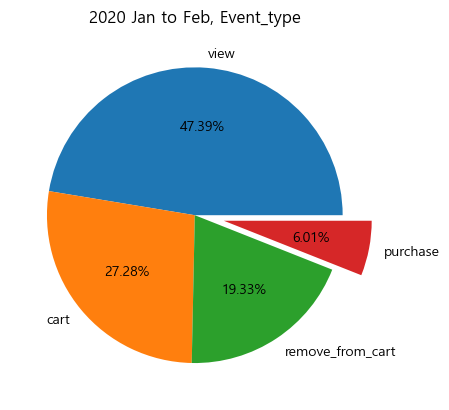

In [26]:
# 두달 동안 각 event_type 횟수
plt.figure(5, )
exp = [0, 0, 0, 0.2]
plt.title('2020 Jan to Feb, Event_type')
plt.pie(evt_type_date, labels=evt_type_date.index, explode=exp, autopct='%.2f%%');

In [27]:
event_type_count = df_all.groupby(["month", "event_type"]).count()["event_time"]

In [28]:
# 1월과 2월 비교 (두 달동안 각각의 이벤트 비율이 비슷하다.)
plt.figure(figsize=(7, 12))
fig = px.bar(event_type_count.reset_index(), x="month", y="event_time", color="event_type",
             title="Events by Month", text_auto='.3s', barmode='group')
fig.show();

<Figure size 700x1200 with 0 Axes>

# RFM 기법

In [29]:
# '구매 완료'한 고객 대상
pur = df_all[df_all['event_type'] == 'purchase']

In [30]:
# 전체 고객
num_cus = pur.user_id.value_counts().index.nunique()
num_cus_jan = pur[pur['month'] == 1].user_id.value_counts().index.nunique()
num_cus_feb = pur[pur['month'] == 2].user_id.value_counts().index.nunique()
print('전체 고객 수는', num_cus, '명 입니다.')
print('1월 고객 수는', num_cus_jan, '명 입니다.')
print('2월 고객 수는', num_cus_feb, '명 입니다.')

전체 고객 수는 49473 명 입니다.
1월 고객 수는 28220 명 입니다.
2월 고객 수는 25759 명 입니다.


In [31]:
# 1월이 2월보다 이틀 더 있기 때문에 상대적으로 고객 수가 더 많을 수 있다.
pur[pur['month'] == 1]['date'].max(), pur[pur['month'] == 2]['date'].max()

('01/31', '02/29')

In [32]:
pur.head(1)

event_time event_type  product_id          category_id brand  \
60 2020-01-01 00:06:07   purchase     5802440  2151191070908613477   NaN   

    price    user_id   date  month  day   day_name  
60   2.16  595411904  01/01      1    1  Wednesday

## Recency - rc_pur

- 최근일수록 좋다.
- 2020년 2월 29일이 데이터의 마지막 날이므로, 그 바로 다음 날인 2020년 3월 1일을 기준으로 최근성을 계산하였다.
    - 각 고객이 구매가 이루어진 날 중, 제일 최근인 날을 선택하여 계산했다.
    - (2020년 3월 1일) - (최근 결제일)

In [33]:
# 기준일 : 데이터에서 가장 마지막 날짜에서 하루 더한 날짜
recent_date = max(pur.event_time) + datetime.timedelta(days=1)
print(recent_date)

2020-03-01 23:54:44


In [36]:
rc_pur = pur.groupby('user_id').agg({'event_time' : lambda x: (recent_date - x.max()).days})

In [37]:
# 가장 최근에 구매한 고객일수록 날짜 수가 적다.
rc_pur.columns = ['Days']
rc_pur.sort_values('Days', ascending=True)[:10]

Days
user_id        
622073202     1
247633346     1
620824047     1
577833508     1
577892855     1
578111968     1
435937046     1
435923407     1
435867669     1
578501317     1

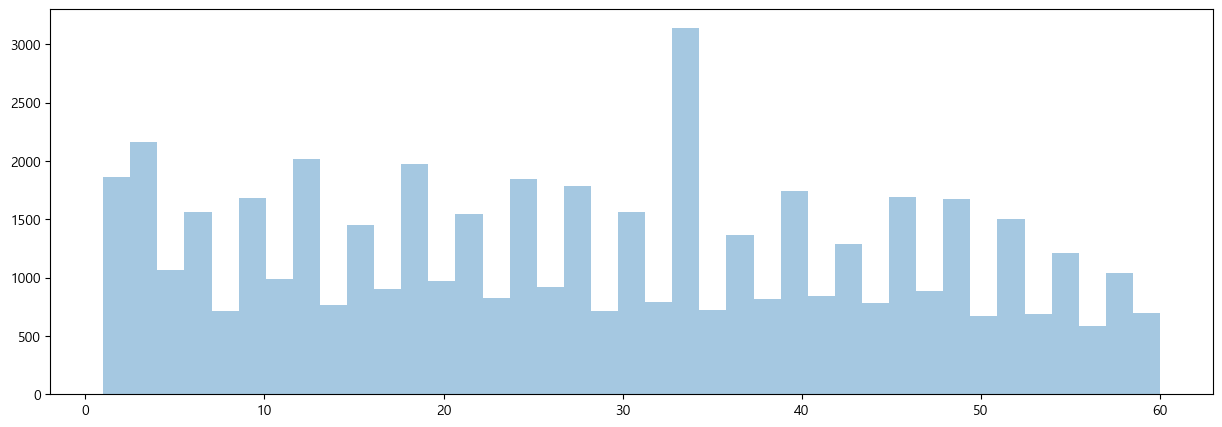

In [38]:
plt.figure(figsize=(15, 5))
sns.distplot(rc_pur, kde=False);

In [39]:
rc_pur.values.min(), rc_pur.values.max()

(1, 60)

In [40]:
len(rc_pur[rc_pur.values < 5])

4023

- 위 그래프의 분포를 보아 1에서 60까지, 다음과 같이 7개의 구간으로 나누어 산정한다. 최근 결제일까지 숫자가 작을수록 높은 점수를 부여했다.
    - 7 : 1 이상 5 미만
    - 6 : 5 이상 10 미만
    - 5 : 10 이상 20 미만
    - 4 : 20 이상 30 미만
    - 3 : 30 이상 40 미만
    - 2 : 40 이상 50 미만
    - 1 : 50 이상

## Frequency - cnt_pur

- 고객별 구매한 횟수

In [43]:
def data_cnt(strs, data):
    d = data.groupby('user_id')['price']
    avg = d.count().mean()
    medi = d.count().median()
    mx = d.count().max()
    mn = d.count().min()
    print(f'** {strs} Report **')
    print(f'평균 구매 횟수 : {avg:.4f}')
    print(f'최소 구매 횟수 : {mn}')
    print(f'중앙 구매 횟수 : {medi}')
    print(f'최대 구매 횟수 : {mx}')

    return pd.DataFrame([{'평균' : avg, '최솟값' : mn ,'중앙값' : medi, '최댓값' : mx}], index=[strs])

In [44]:
both_cnt = data_cnt('두 달', pur)
print()
jan_cnt = data_cnt('1월', pur[pur.month == 1])
print()
feb_cnt = data_cnt('2월', pur[pur.month == 2])

** 두 달 Report **
평균 구매 횟수 : 10.2221
최소 구매 횟수 : 1
중앙 구매 횟수 : 6.0
최대 구매 횟수 : 461

** 1월 Report **
평균 구매 횟수 : 9.3466
최소 구매 횟수 : 1
중앙 구매 횟수 : 6.0
최대 구매 횟수 : 263

** 2월 Report **
평균 구매 횟수 : 9.3931
최소 구매 횟수 : 1
중앙 구매 횟수 : 6.0
최대 구매 횟수 : 461


In [45]:
# 유저별 구매 횟수 분포 확인
pur.groupby('user_id')['price'].count().sort_values(ascending=False).describe()

count    49473.000000
mean        10.222121
std         14.346544
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max        461.000000
Name: price, dtype: float64

In [46]:
cnt_pur = pur.groupby('user_id')['price'].count().sort_values(ascending=False)

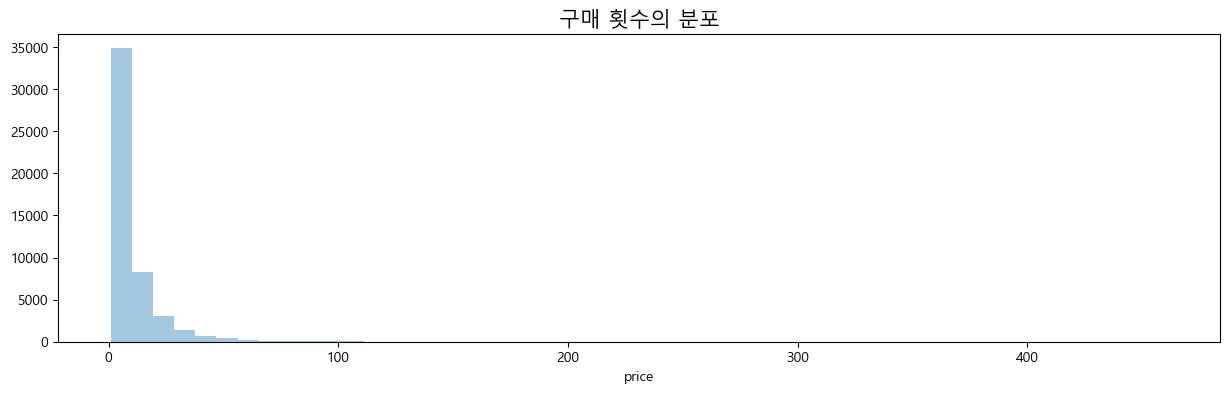

In [47]:
plt.figure(figsize = (15, 4))
sns.distplot(cnt_pur, kde=False);
plt.title('구매 횟수의 분포', fontsize=15);

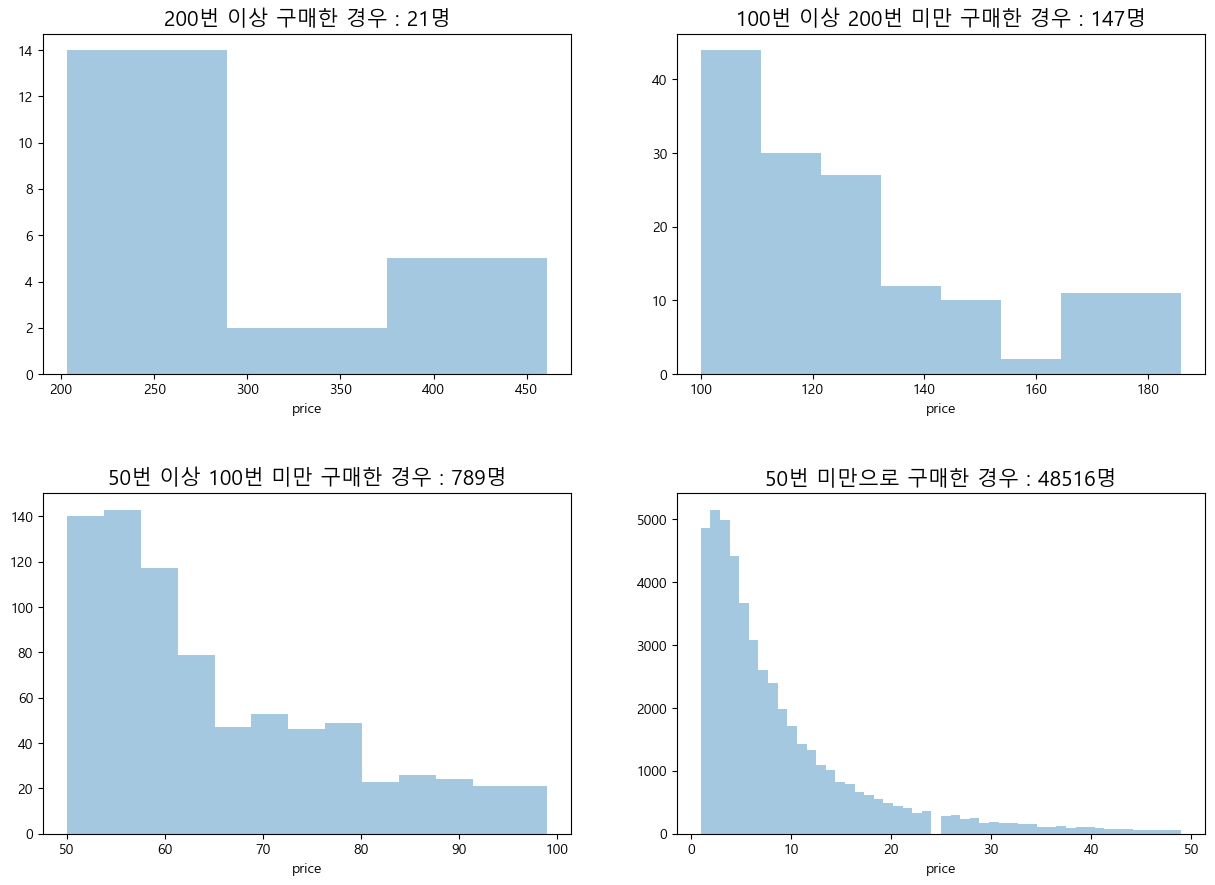

In [37]:
plt.figure(figsize = (15, 10))

plt.subplot(221)
sns.distplot(cnt_pur[cnt_pur.values >= 200], kde=False);
plt.title(f'200번 이상 구매한 경우 : {len(cnt_pur[cnt_pur.values >= 200])}명', fontsize=15);

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.subplot(222)
sns.distplot(cnt_pur[(cnt_pur.values >= 100) & (cnt_pur.values < 200)], kde=False);
plt.title(f'100번 이상 200번 미만 구매한 경우 : {len(cnt_pur[(cnt_pur.values >= 100) & (cnt_pur.values < 200)])}명', fontsize=15);

plt.subplot(223)
sns.distplot(cnt_pur[(cnt_pur.values >= 50) & (cnt_pur.values < 100)], kde=False);
plt.title(f'50번 이상 100번 미만 구매한 경우 : {len(cnt_pur[(cnt_pur.values >= 50) & (cnt_pur.values < 100)])}명', fontsize=15);

plt.subplot(224)
sns.distplot(cnt_pur[cnt_pur.values < 50], kde=False);
plt.title(f'50번 미만으로 구매한 경우 : {len(cnt_pur[cnt_pur.values < 50])}명', fontsize=15);

In [48]:
cnt_pur.values.min(), cnt_pur.values.max()

(1, 461)

- 위의 그래프로 보아, 50번 미만으로 상당히 치우쳐져 있음을 확인할 수 있다. 다음 사항을 고려하여 아래와 같이 구간을 나누었다.
    - 7 : 200번 이상
    - 6 : 100번 이상 200번 미만
    - 5 : 50번 이상 100번 미만
    - 4 : 30번 이상 50번 미만
    - 3 : 10번 이상 30번 미만
    - 2 : 5번 이상 10번 미만
    - 1 : 5 미만

## Monetary - sum_pur

- 고객별 사용한 금액

In [91]:
def data_sum(strs, data):
    d = data.groupby('user_id')['price']
    avg = d.sum().mean()
    medi = d.sum().median()
    mx = d.sum().max()
    mn = d.sum().min()
    print(f'{strs} Report')
    print(f'평균 구매 금액 : {avg:.4f}')
    print(f'최소 구매 금액 : {mn:.4f}')
    print(f'중앙 구매 금액 : {medi:.4f}')
    print(f'최대 구매 금액 : {mx:.4f}')

    return pd.DataFrame([{'평균' : avg, '최솟값' : mn ,'중앙값' : medi, '최댓값' : mx}], index=[strs])

In [92]:
both_sum = data_sum('두 달', pur)
print()
jan_sum = data_sum('1월', pur[pur.month == 1])
print()
feb_sum = data_sum('2월', pur[pur.month == 2])

두 달 Report
평균 구매 금액 : 51.1403
최소 구매 금액 : 0.1300
중앙 구매 금액 : 32.5900
최대 구매 금액 : 1850.4000

1월 Report
평균 구매 금액 : 46.8708
최소 구매 금액 : 0.1300
중앙 구매 금액 : 32.7100
최대 구매 금액 : 1843.3200

2월 Report
평균 구매 금액 : 46.8717
최소 구매 금액 : 0.1300
중앙 구매 금액 : 31.2400
최대 구매 금액 : 1850.4000


In [93]:
# 상위 999명
sum_pur = pur.groupby('user_id')['price'].sum().sort_values(ascending=False)
sum999 = sum_pur[:999]
sum999

user_id
612372707    1850.40
596971707    1843.32
469299888    1786.01
507727824    1566.81
573823111    1559.21
              ...   
523655787     240.75
395217439     240.69
525303977     240.37
594842596     240.28
424670437     240.07
Name: price, Length: 999, dtype: float64

In [94]:
sum999_min = sum999.values.min()

In [95]:
a = pur.groupby('user_id')['price'].sum().sort_values(ascending=False)
b = a.values < sum999_min
a[b].describe()

count    48474.000000
mean        44.199596
std         40.898711
min          0.130000
25%         15.880000
50%         31.720000
75%         55.270000
max        239.680000
Name: price, dtype: float64

In [96]:
# 상위 1%의 금액
pr_1 = pur.groupby('user_id')['price'].sum().sort_values(ascending=False).quantile(0.99)
pr_2 = pur.groupby('user_id')['price'].sum().sort_values(ascending=False).quantile(0.9)
pr_3 = pur.groupby('user_id')['price'].sum().sort_values(ascending=False).quantile(0.75)
pr_4 = pur.groupby('user_id')['price'].sum().sort_values(ascending=False).quantile(0.5)
pr_5 = pur.groupby('user_id')['price'].sum().sort_values(ascending=False).quantile(0.25)

print(f'상위 1%에 속하려면 최소 {pr_1:.4f} 만큼 써야 합니다.')
print(f'상위 10%에 속하려면 최소 {pr_2:.4f} 만큼 써야 합니다.')
print(f'상위 25%에 속하려면 최소 {pr_3:.4f} 만큼 써야 합니다.')
print(f'상위 50%에 속하려면 최소 {pr_4:.4f} 만큼 써야 합니다.')
print(f'상위 50%에 속하려면 최소 {pr_5:.4f} 만큼 써야 합니다.')

상위 1%에 속하려면 최소 320.6884 만큼 써야 합니다.
상위 10%에 속하려면 최소 106.1800 만큼 써야 합니다.
상위 25%에 속하려면 최소 57.9400 만큼 써야 합니다.
상위 50%에 속하려면 최소 32.5900 만큼 써야 합니다.
상위 50%에 속하려면 최소 16.1700 만큼 써야 합니다.


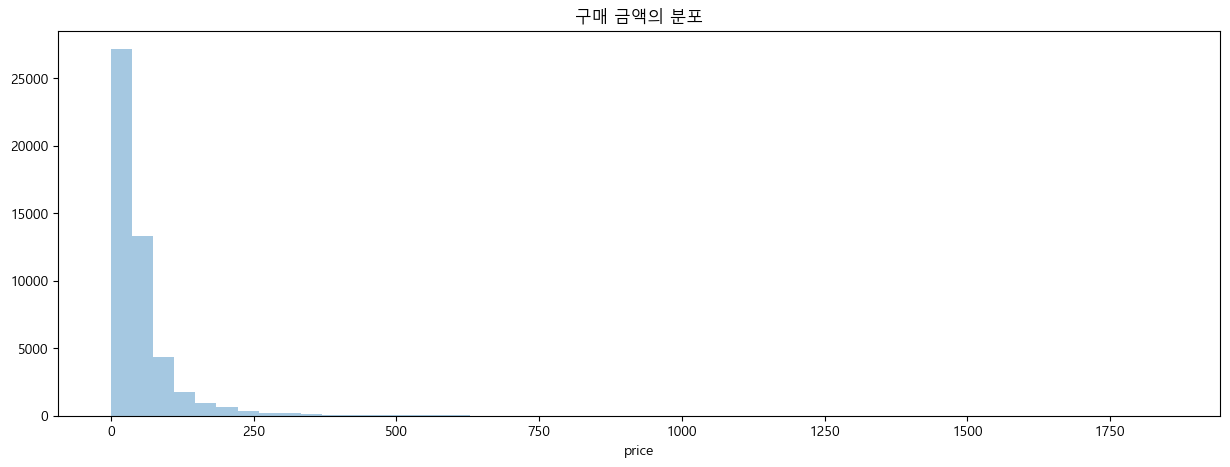

In [97]:
plt.figure(figsize = (15, 5))
sns.distplot(sum_pur, kde=False);
plt.title('구매 금액의 분포');

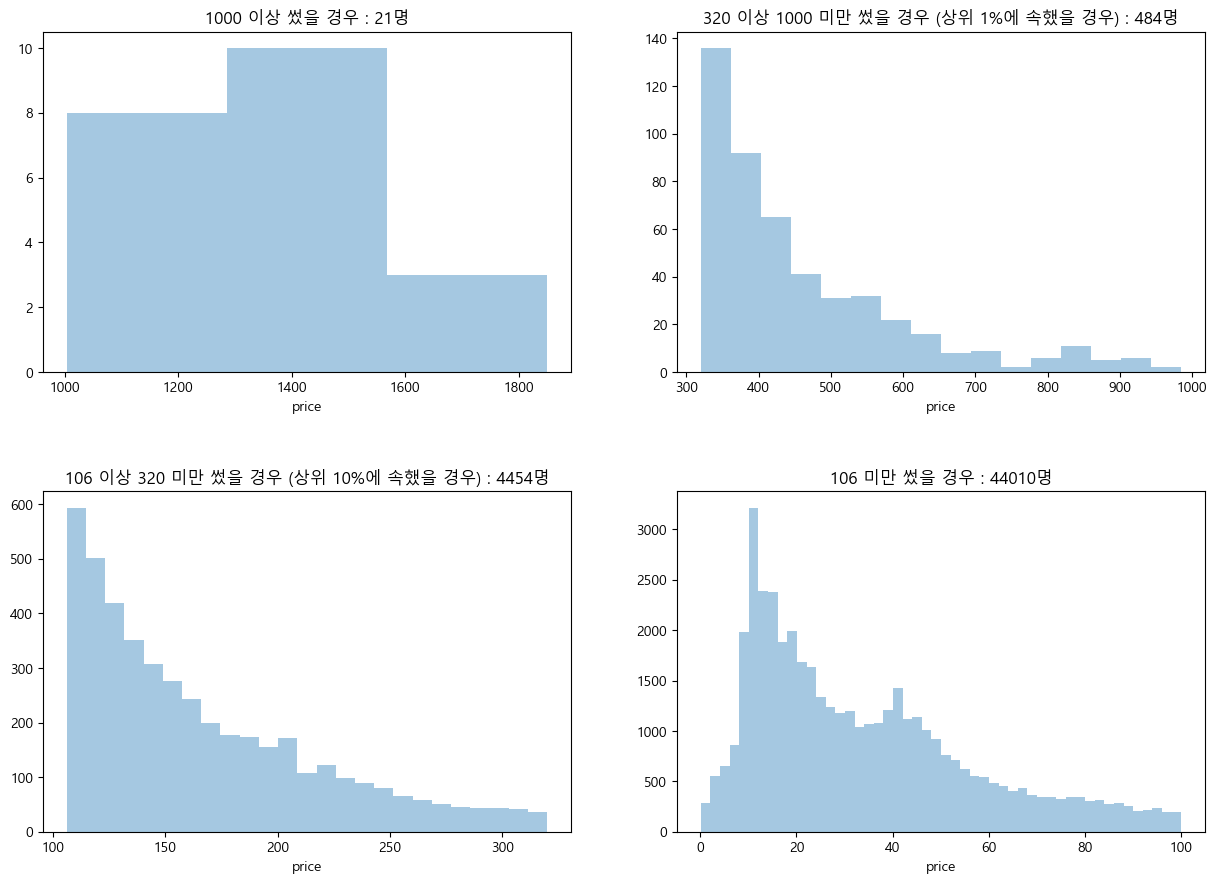

In [98]:
plt.figure(figsize = (15, 10))

plt.subplot(221)
sns.distplot(sum_pur[sum_pur.values >= 1000], kde=False);
plt.title(f'1000 이상 썼을 경우 : {len(sum_pur[sum_pur.values >= 1000])}명');

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

plt.subplot(222)
sns.distplot(sum_pur[(sum_pur.values >= 320) & (sum_pur.values < 1000)], kde=False);
plt.title(f'320 이상 1000 미만 썼을 경우 (상위 1%에 속했을 경우) : {len(sum_pur[(sum_pur.values >= 320) & (sum_pur.values < 1000)])}명');

plt.subplot(223)
sns.distplot(sum_pur[(sum_pur.values >= 106) & (sum_pur.values < 320)], kde=False);
plt.title(f'106 이상 320 미만 썼을 경우 (상위 10%에 속했을 경우) : {len(sum_pur[(sum_pur.values >= 106) & (sum_pur.values < 320)])}명');

plt.subplot(224)
sns.distplot(sum_pur[sum_pur.values < 100], kde=False);
plt.title(f'106 미만 썼을 경우 : {len(sum_pur[sum_pur.values < 100])}명');

- 위의 그래프로 보아, 100번 미만으로 상당히 치우쳐져 있음을 확인할 수 있다. 다음 사항을 고려하여 아래와 같이 구간을 나누었다.
    - 7 : 1000 이상
    - 6 : 320 이상 1000 미만
    - 5 : 106 이상 320 미만
    - 4 : 57 이상 106 미만
    - 3 : 32 이상 57 미만
    - 2 : 16 이상 32 미만
    - 1 : 16 미만

## 점수 산정

- Receny : 값이 작을수록 좋다. (가장 최근까지 접속했다.)
- Frequency : 값이 클수록 좋다. (자주 방문했다.)
- Monetary : 값이 클수록 좋다. (가장 큰 금액을 사용했다.)

In [101]:
rfm_df = pur.groupby(['user_id']).agg({'event_time': lambda x: (recent_date - x.max()).days, 'product_id':'count', 'price':'sum'})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

In [102]:
rfm_df.reset_index(inplace=True)

In [103]:
rfm_df.head(2)

user_id  Recency  Frequency  Monetary
0  10280338       11         70    123.00
1  12936739       44          2     29.89

### 각 항목별로 점수 산정

In [105]:
rfm_scores = rfm_df.copy()

In [106]:
def r_score(data):
    r = data['Recency']
    data['R'] = 0
    for i in range(len(data)):
        if r[i] < 5:
            data['R'][i] = 7
        elif r[i] < 10:
            data['R'][i] = 6
        elif r[i] < 20:
            data['R'][i] = 5
        elif r[i] < 30:
            data['R'][i] = 4
        elif r[i] < 40:
            data['R'][i] = 3
        elif r[i] < 50:
            data['R'][i] = 2
        else:
            data['R'][i] = 1

In [107]:
r_score(rfm_scores)

In [108]:
def f_score(data):
    r = data['Frequency']
    data['F'] = 0
    for i in range(len(data)):
        if r[i] < 5:
            data['F'][i] = 1
        elif r[i] < 10:
            data['F'][i] = 2
        elif r[i] < 30:
            data['F'][i] = 3
        elif r[i] < 50:
            data['F'][i] = 4
        elif r[i] < 100:
            data['F'][i] = 5
        elif r[i] < 200:
            data['F'][i] = 6
        else:
            data['F'][i] = 7

In [109]:
f_score(rfm_scores)

In [110]:
def m_score(data):
    r = data['Monetary']
    data['M'] = 0
    for i in range(len(data)):
        if r[i] < 16:
            data['M'][i] = 1
        elif r[i] < 32:
            data['M'][i] = 2
        elif r[i] < 57:
            data['M'][i] = 3
        elif r[i] < 106:
            data['M'][i] = 4
        elif r[i] < 320:
            data['M'][i] = 5
        elif r[i] < 1000:
            data['M'][i] = 6
        else:
            data['M'][i] = 7

In [111]:
m_score(rfm_scores)

In [112]:
rfm_scores.head(2)

user_id  Recency  Frequency  Monetary  R  F  M
0  10280338       11         70    123.00  5  5  5
1  12936739       44          2     29.89  2  1  2

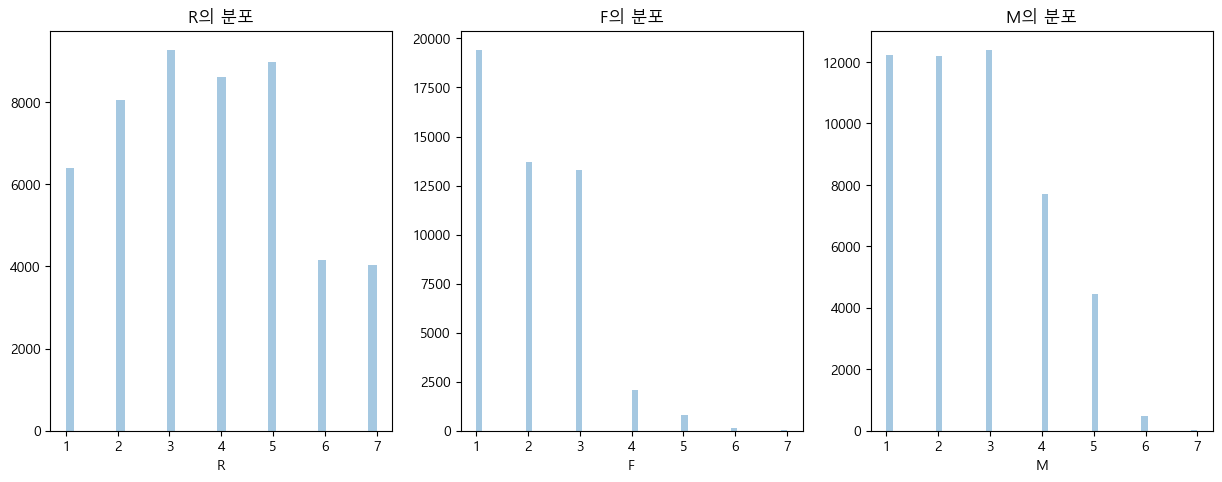

In [113]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
sns.distplot(rfm_scores['R'], kde=False);
plt.title(f'R의 분포');

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)

# Frequency의 분포가 극단적으로 하위 점수에 분포해 있다. (보완 필요)
plt.subplot(132)
sns.distplot(rfm_scores['F'], kde=False);
plt.title(f'F의 분포');

plt.subplot(133)
sns.distplot(rfm_scores['M'], kde=False);
plt.title(f'M의 분포');

#### 최우수 고객 선정

In [114]:
con1 = (rfm_scores['R'] >= 6) & (rfm_scores['F'] >= 6) & (rfm_scores['M'] >= 6)
con1_d = (rfm_scores['R'] < 6) & (rfm_scores['F'] < 6) & (rfm_scores['M'] < 6)
con2 = (rfm_scores['R'] >= 4) & (rfm_scores['F'] >= 4) & (rfm_scores['M'] >= 4)
con3 = (rfm_scores['R'] < 4) & (rfm_scores['F'] < 4) & (rfm_scores['M'] < 4)
con4 = (rfm_scores['R'] >= 5) & (rfm_scores['F'] >= 5) & (rfm_scores['M'] >= 5)

In [115]:
a = len(rfm_scores[con1])
b = len(rfm_scores[(con1_d) & (con2)])
c = len(rfm_scores[con3])
d = len(rfm_scores[con4])

print(f'R, F, M이 적어도 6 이상인 고객 수 : {a}')
print(f'R, F, M이 4 이상 6 미만인 고객 수 : {b}')
print(f'R, F, M이 4 미만인 고객 수 : {c}')
print(f'R, F, M이 5 이상인 고객 수 : {d}')

R, F, M이 적어도 6 이상인 고객 수 : 53
R, F, M이 4 이상 6 미만인 고객 수 : 1055
R, F, M이 4 미만인 고객 수 : 18706
R, F, M이 5 이상인 고객 수 : 605


- R, F, M이 5 이상인 고객 : vvip
- R, F, M이 3 이상 5 미만인 고객 : vip

In [116]:
cond = (rfm_scores['R'] >= 5) & (rfm_scores['F'] >= 5) & (rfm_scores['M'] >= 5)
vvip = rfm_scores[cond]

In [117]:
vvip_list = vvip['user_id']

In [119]:
cond1 = (rfm_scores['R'] < 5) & (rfm_scores['F'] < 5) & (rfm_scores['M'] < 5)
cond2 = (rfm_scores['R'] >= 3) & (rfm_scores['F'] >= 3) & (rfm_scores['M'] >= 3)

vip = rfm_scores[cond1 & cond2]

In [120]:
vip_list = vip['user_id']

### VVIP 고객

In [121]:
pur_imsi = pur.copy()
vips_imsi = df_all.copy()

In [122]:
# event_type == 'purchase' 인 데이터
vvip_df = pur_imsi.set_index('user_id').loc[vvip_list].reset_index()

In [123]:
# event_type 구분없이 vvip인 전체 데이터
vvip = vips_imsi.set_index('user_id').loc[vvip_list].reset_index()

In [124]:
vvip_df.head(2)

user_id          event_time event_type  product_id          category_id  \
0  10280338 2020-01-12 22:54:37   purchase     5875289  1487580010100293687   
1  10280338 2020-02-13 21:25:18   purchase     5863562  1487580007717929935   

      brand  price   date  month  day  day_name  
0  kinetics   18.1  01/12      1   12    Sunday  
1       NaN    1.1  02/13      2   13  Thursday

In [125]:
vvip_df.groupby('day_name')['price'].count()

day_name
Friday       6820
Monday       6597
Saturday     5863
Sunday       6921
Thursday     7872
Tuesday      8790
Wednesday    6906
Name: price, dtype: int64

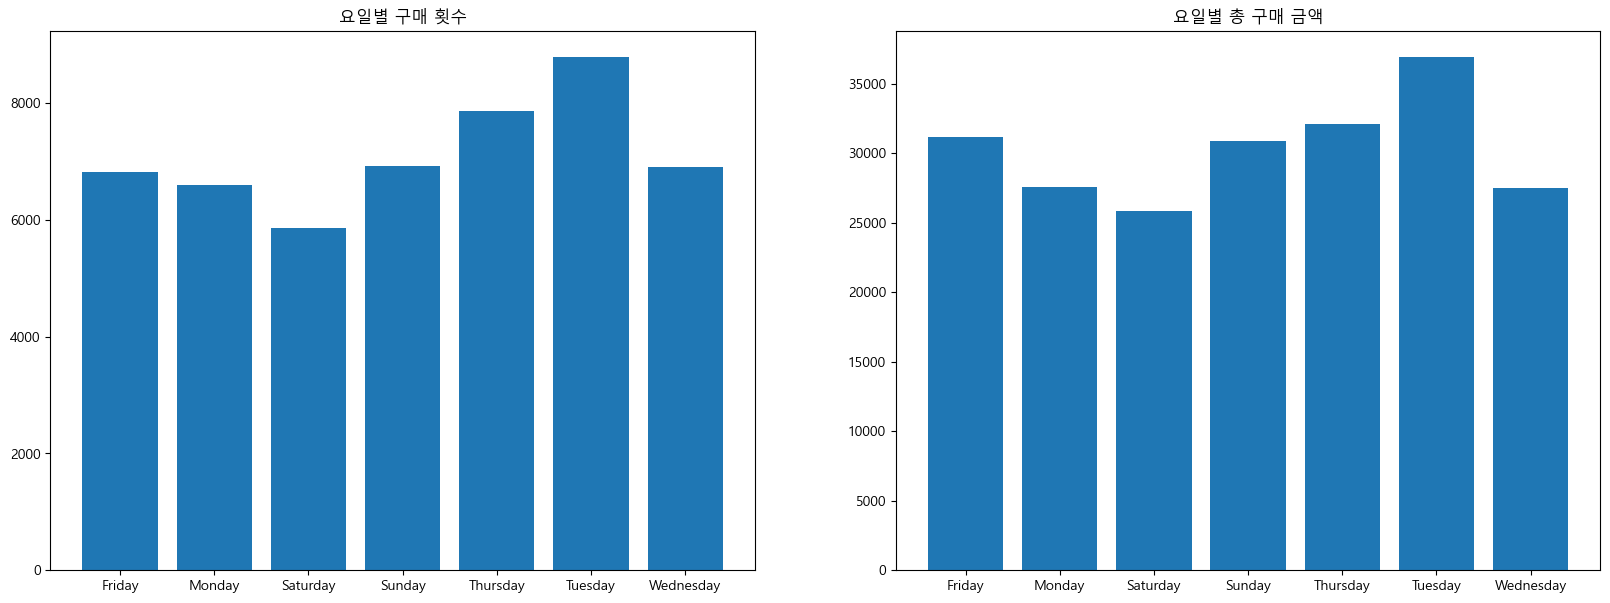

In [143]:
plt.figure(figsize= (20,7))
plt.subplot(1, 2, 1)
plt.bar(vvip_df.groupby('day_name')['price'].count().index, vvip_df.groupby('day_name')['price'].count().values);
plt.title('요일별 구매 횟수');

plt.subplot(1, 2, 2)
plt.bar(vvip_df.groupby('day_name')['price'].sum().index, vvip_df.groupby('day_name')['price'].sum().values);
plt.title('요일별 총 구매 금액');

- 화요일, 목요일에 특히 구매가 많이 이루어지는 동시에 총 구매 금액도 높다.

In [127]:
v1 = vvip.groupby('event_type')['price'].count()

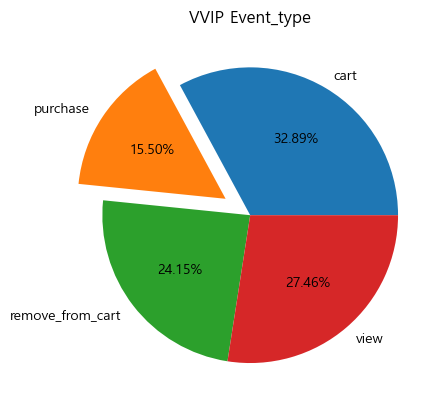

In [128]:
# 두달 동안 각 event_type 횟수
plt.figure(5, )
exp = [0.0, 0.2, 0, 0]
plt.title('VVIP Event_type')
plt.pie(v1, labels=v1.index, explode=exp, autopct='%.2f%%');

- VVIP고객의 event_type을 확인한 결과, 전체 고객의 구매 비율(6.01%)보다 9.39% 더 높다.

### VIP 고객

In [129]:
vip_df = pur_imsi.set_index('user_id').loc[vip_list].reset_index()

In [130]:
# event_type 구분없이 vvip인 전체 데이터
vip = vips_imsi.set_index('user_id').loc[vip_list].reset_index()

In [131]:
vip_df.head(2)

user_id          event_time event_type  product_id          category_id  \
0  46383252 2020-01-28 06:53:25   purchase     5710614  1487580012096782476   
1  46383252 2020-01-28 06:53:25   purchase     5742190  1487580012096782476   

   brand  price   date  month  day day_name  
0  irisk   4.29  01/28      1   28  Tuesday  
1    NaN   3.65  01/28      1   28  Tuesday

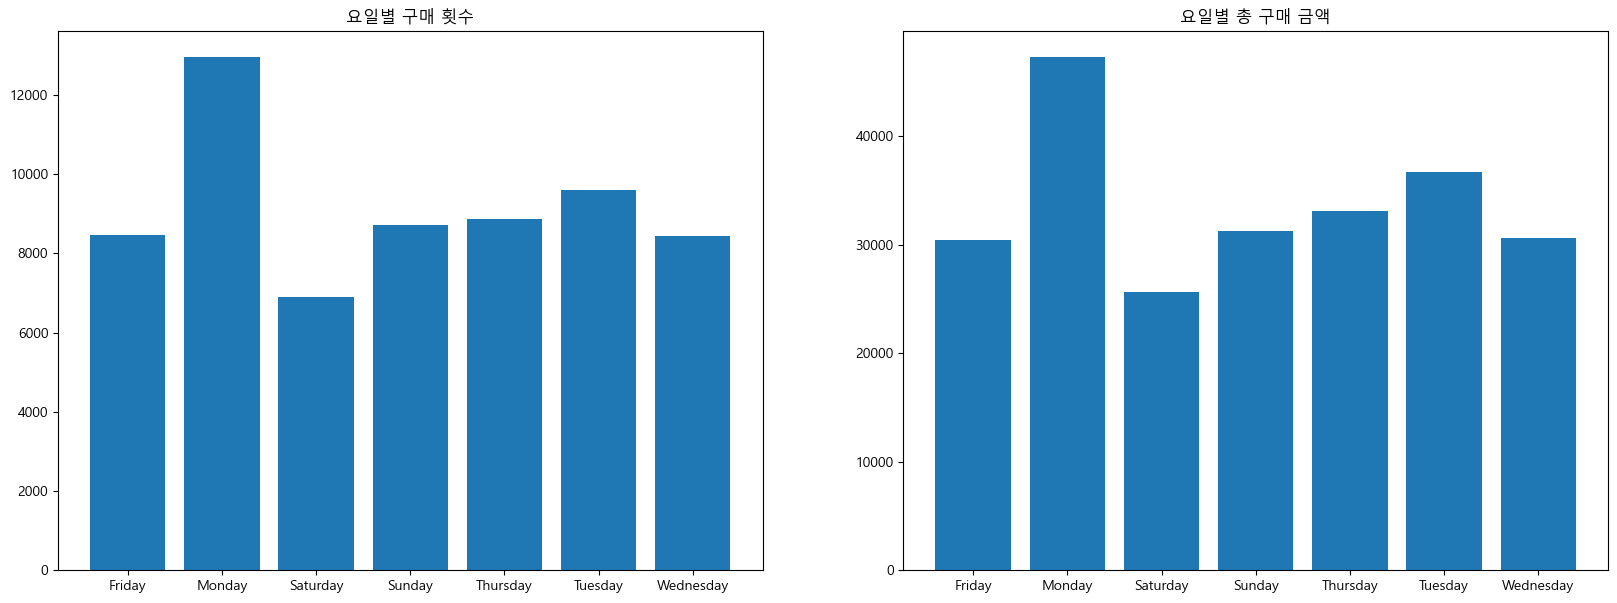

In [142]:
plt.figure(figsize= (20,7))
plt.subplot(1, 2, 1)
plt.bar(vip_df.groupby('day_name')['price'].count().index, vip_df.groupby('day_name')['price'].count().values);
plt.title('요일별 구매 횟수');

plt.subplot(1, 2, 2)
plt.bar(vip_df.groupby('day_name')['price'].sum().index, vip_df.groupby('day_name')['price'].sum().values);
plt.title('요일별 총 구매 금액');

- 월요일이 압도적으로 구매 횟수가 많고 총 구매 금액이 높다.

In [133]:
v2 = vip.groupby('event_type')['price'].count()

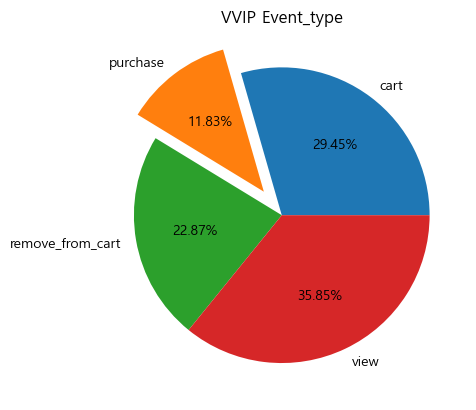

In [134]:
# 두달 동안 각 event_type 횟수
plt.figure(5, )
exp = [0.0, 0.2, 0, 0]
plt.title('VVIP Event_type')
plt.pie(v2, labels=v2.index, explode=exp, autopct='%.2f%%');

- VVIP고객의 event_type을 확인한 결과, 전체 고객의 구매 비율(6.01%)보다 5.75% 더 높다.

## 군집 생성

### 스케일링 사용

#### 각 구간마다 점수를 매긴 데이터

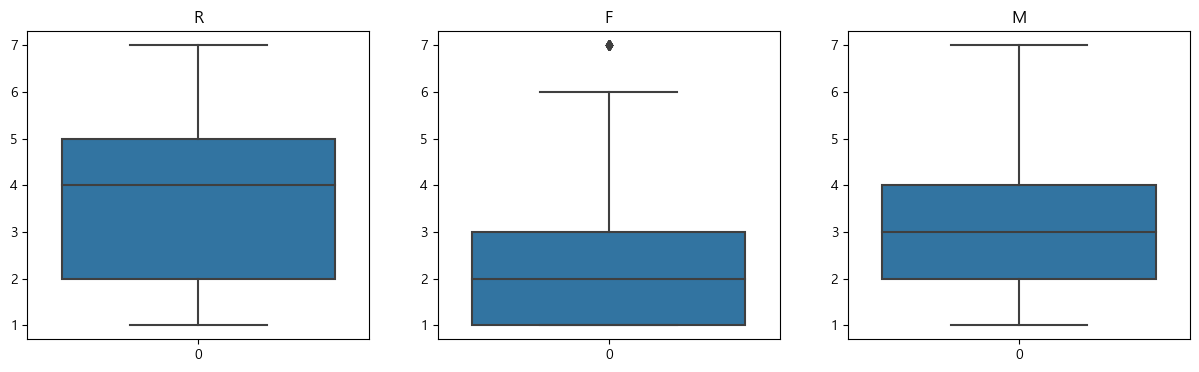

In [135]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.boxplot(rfm_scores['R']);
plt.title('R');

plt.subplot(1, 3, 2)
sns.boxplot(rfm_scores['F']);
plt.title('F');

plt.subplot(1, 3, 3)
sns.boxplot(rfm_scores['M']);
plt.title('M');

- 이상치가 거의 없다.

#### 기존 원 데이터

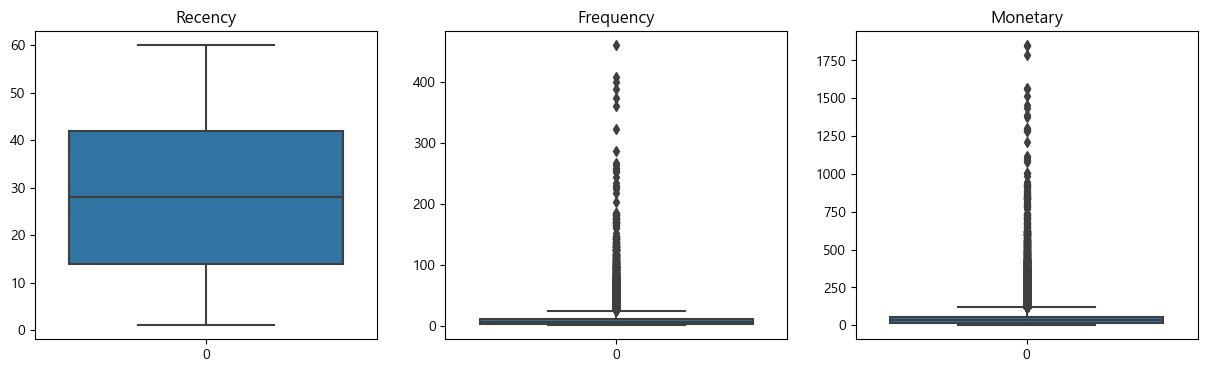

In [136]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.boxplot(rfm_df['Recency']);
plt.title('Recency');

plt.subplot(1, 3, 2)
sns.boxplot(rfm_df['Frequency']);
plt.title('Frequency');

plt.subplot(1, 3, 3)
sns.boxplot(rfm_df['Monetary']);
plt.title('Monetary');

- Frequency 와 Monetary의 이상치가 크다.
- 이상치 영향을 최소화하는 RobustScaler을 사용한다.

In [137]:
from sklearn.preprocessing import RobustScaler

In [138]:
rfm = rfm_df.drop('user_id', axis=1)

In [139]:
rs = RobustScaler()
rs_dt = rs.fit_transform(rfm)
rs_df = pd.DataFrame(rs_dt)
rs_df.columns = rfm.columns

In [140]:
rs_df.head(2)

Recency  Frequency  Monetary
0 -0.607143   7.111111  2.164472
1  0.571429  -0.444444 -0.064640

### K-Means

In [48]:
km_df = rs_df.copy()

In [49]:
from sklearn.cluster import KMeans

### 최적 군집수 찾기(1)_Elbow 함수

In [50]:
cls = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state=915)
    kmeans.fit(km_df)
    cls.append(kmeans.inertia_)

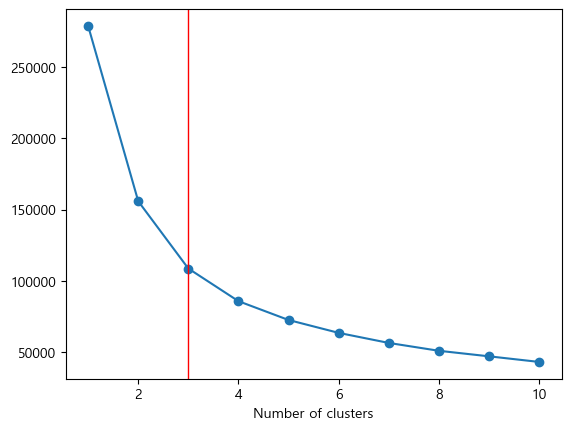

In [64]:
plt.plot(range(1, 11), cls, marker='o')
plt.xlabel('Number of clusters')
plt.axvline(x= 3, color='r', linewidth=1)
plt.show()

### 최적 군집수 찾기(2)_실루엣 계수

In [74]:
from sklearn.metrics import silhouette_score

In [72]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(km_df)
    score = silhouette_score(km_df, kmeans.labels_)
    silhouette_scores.append(score)

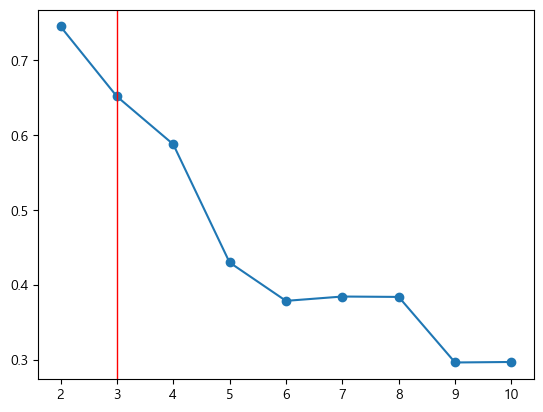

In [75]:
plt.plot(range(2, 11), silhouette_scores, marker='o');
plt.axvline(x=3, color='r', linewidth=1);

- 최종 군집 개수는 3개로 결정.

### 모델링

In [54]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 915)
kmeans.fit(km_df)
km_df['cluster'] = kmeans.fit_predict(km_df)

In [55]:
# 각 군집의 중심점
centers = kmeans.cluster_centers_

In [56]:
km_df.head(2)

Recency  Frequency  Monetary  cluster
0 -0.607143   7.111111  2.164472        0
1  0.571429  -0.444444 -0.064640        1

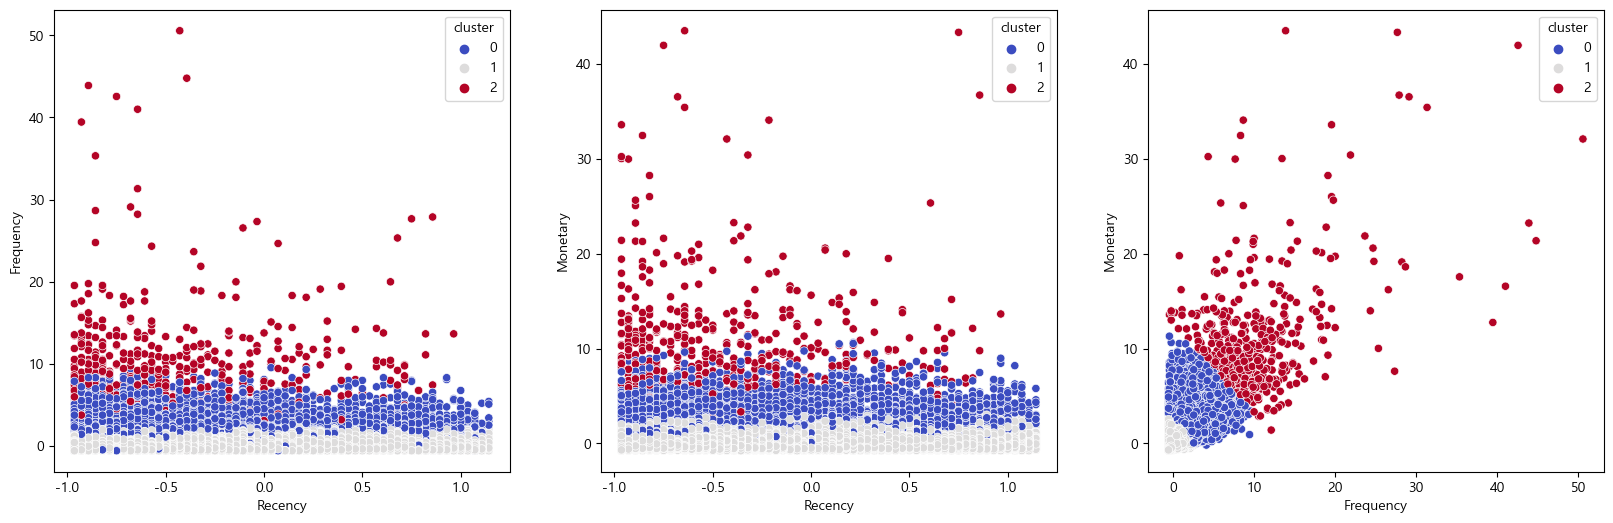

In [57]:
plt.figure(figsize=(20, 6))

X = km_df

plt.subplot(131)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], data=km_df, hue='cluster', palette='coolwarm')

plt.subplot(132)
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,2], data=km_df, hue='cluster', palette='coolwarm')

plt.subplot(133)
sns.scatterplot(x=X.iloc[:,1], y=X.iloc[:,2], data=km_df, hue='cluster', palette='coolwarm')

plt.show()

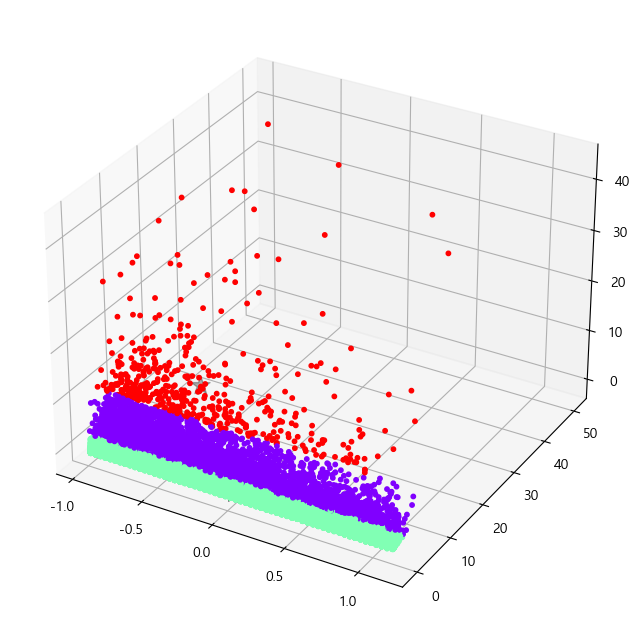

In [58]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X = km_df

ax.scatter(  X.iloc[:,0]
           , X.iloc[:,1]
           , X.iloc[:,2]
           , c = X.cluster
           , s = 10
           , cmap = "rainbow"
           , alpha = 1
          )


ax.scatter(centers[:,0],centers[:,1],centers[:,2] ,c='black', s=200, marker='*')
plt.show()

### PCA

- 위의 클러스터링이 잘 되어 있는지 확인하기 위해 진행

In [67]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)
pca_dt = pca.fit_transform(km_df)

km_df["pca_x"] = pca_dt[:,0]
km_df["pca_y"] = pca_dt[:,1]

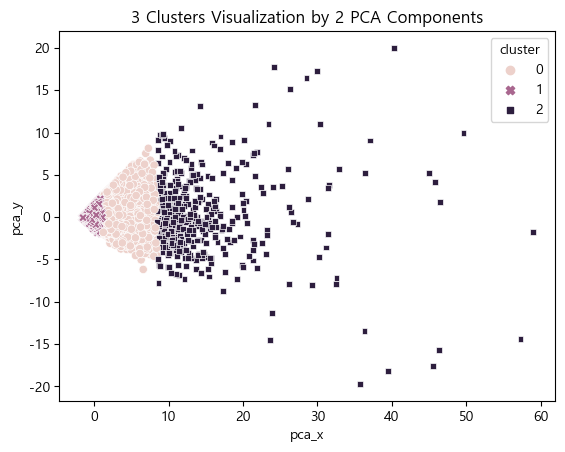

In [70]:
sns.scatterplot(x="pca_x", y="pca_y", data=km_df, hue= "cluster", style = "cluster")
plt.title("3 Clusters Visualization by 2 PCA Components")
plt.show();

# 군집 분석

In [361]:
imsi = rfm_scores.copy()

In [362]:
imsi['cls'] = km_df['cluster']

In [363]:
imsi.cls.value_counts()

1    42500
0     6488
2      485
Name: cls, dtype: int64

## Cluster == 2

In [364]:
a2 = imsi[imsi['cls'] == 2]

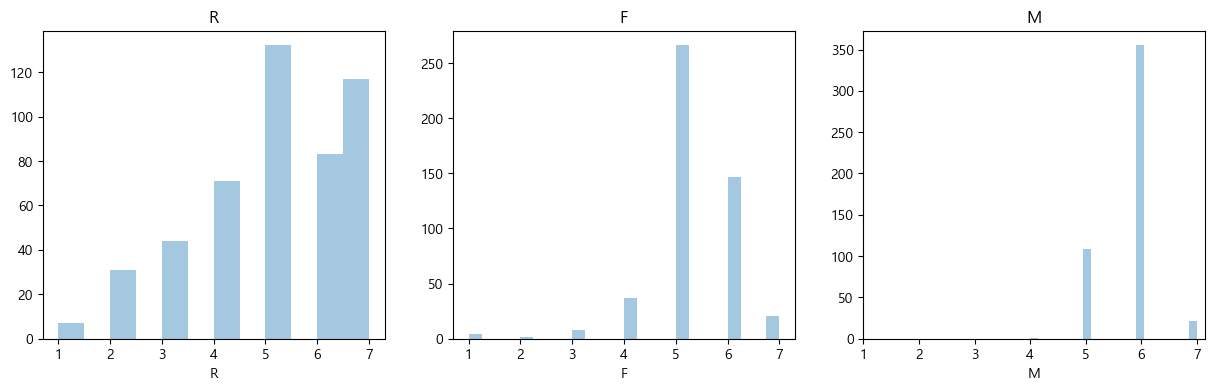

In [365]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.distplot(a2['R'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('R');

plt.subplot(1, 3, 2)
sns.distplot(a2['F'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('F');

plt.subplot(1, 3, 3)
sns.distplot(a2['M'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('M');

- 다른 두 집단에 비해 각 항목마다 상대적으로 높은 점수에 분포해 있다.
    - 마지막 구매 날짜가 최근에 가깝다.
    - 구매 횟수가 높고 구매 금액이 높다.
    - VIP 고객층은 이 집단에 속할 것이다.

## Cluster == 0

In [366]:
a0 = imsi[imsi['cls'] == 0]

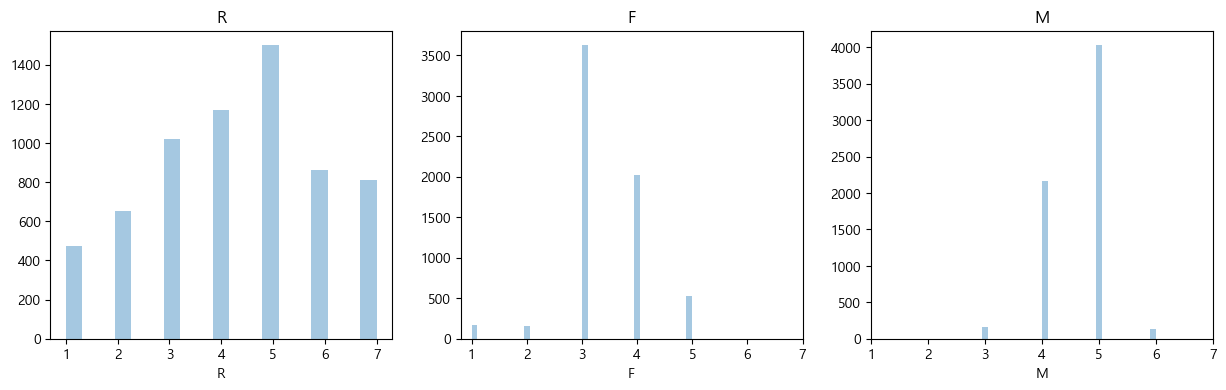

In [367]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.distplot(a0['R'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('R');

plt.subplot(1, 3, 2)
sns.distplot(a0['F'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('F');

plt.subplot(1, 3, 3)
sns.distplot(a0['M'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('M');

- cluster가 2인 집단에 비해 상대적으로 중간 항목에 분포해 있다.
    - cluster가 2인 집단보다는 Frequency와 Monetary에서 상대적으로 한 단계씩 낮은 점수에 분포해 있다.

## Cluster == 1

In [368]:
a1 = imsi[imsi['cls'] == 1]

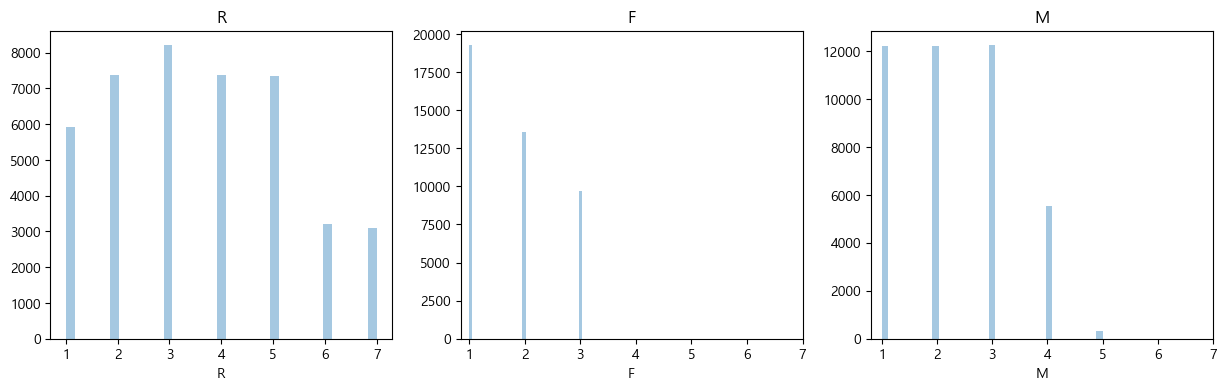

In [369]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.distplot(a1['R'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('R');

plt.subplot(1, 3, 2)
sns.distplot(a1['F'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('F');

plt.subplot(1, 3, 3)
sns.distplot(a1['M'], kde=False);
plt.xticks(np.arange(1, 8))
plt.title('M');

- 다른 두 집단에 비해 상대적으로 낮은 점수에 분포해 있다.
    - 마지막 구매 날짜가 최근보다 뒤떨어져 있지만 고루 분포해 있다.
    - 특히 Frequency와 Monetary가 눈에 띄게 하위 점수에 분포해 있다.